In [6]:
#https://colab.research.google.com/drive/1P9TPRWsDdqJC6IvOxjG2_3QlgCt59P0w?usp=sharing#scrollTo=XGsxbcqxIGJg
#https://www.youtube.com/watch?v=j3VNqtJUoz0&t=363s
#https://www.kaggle.com/code/taranmarley/vitransformer-step-by-step

In [24]:
#IMAGE PATCHING

from torchvision.transforms import Resize, ToTensor

transforms = [Resize((144, 144)), 
              ToTensor()] #les transfo effectués sur chaque image

class Compose(object): #transform image to the same sizes and transform to tensor
    def __init__(self, transforms) -> None:
        self.tansforms = transforms  #ou est la focntion transforms ?

    def __call__(self, *image, target) : #permet d'appeler objet comme des fonctions 
                                                        #exemple : si c = Compose()  -> on peut faire c() pour appeler cette focntion
        for t in self.transforms:  #pour chaque transfo dans transforms (ici on en a 2 - resize + ToTensor())
            print(t)
            image = t(image)
        return image, target
    
c = Compose(transforms)


In [27]:
import albumentations as A
from albumentations.pytorch import ToTensorV2
from torch.utils.data import Dataset
import os
import matplotlib.pyplot as plt
import numpy as np
import torch
import pandas as pd

#parameters 
height_image, width_image = 144, 144

class LeafDataset(Dataset):           #transform data #add labels 
    def __init__(self) -> None:
        super().__init__()

        self.path = "dataset/plant-pathology-2020-fgvc7"

        self.path_dir_X = os.path.join(self.path, 'images')

        self.path_Y = os.path.join(self.path, 'train.csv')
        self.dataframe_Y = pd.read_csv(self.path_Y)
        self.labels = self.dataframe_Y.loc[:, 'healthy':'scab']

        self.transform = A.Compose([
        #A.RandomResizedCrop(height=height_image, width=width_image, p=1.0), #au lieu de 500 - sinon le cpu ne suit pas - et kill tout les kernels python
        A.Resize(height=height_image, width=width_image),
        A.Rotate(20, p=1.0), 
        A.Flip(p=1.0),
        A.Transpose(p=1.0), 
        A.Normalize(p=1.0),  
        ToTensorV2(p=1.0),
        ], p=1.0)

        self.len = len(self.dataframe_Y)

    def __getitem__(self, index): #on defini le dataset et les transfo ici - car quand je vais appeller le dataloader - ca va parcourir toutes le simages donc passé par getitem
        img_name = self.dataframe_Y.loc[index, 'image_id']   #image_id,healthy,multiple_diseases,rust,scab
                                                             #Train_0,0,0,0,1      -> dans train.csv on a le nom du fichier ex : df[0]['image_id] = Train_0
        img_path = f"{self.path_dir_X}/{img_name}.jpg"
        image = plt.imread(img_path)

        image = self.transform(image = image)['image'] #resize / normalized / ....  #on prend ["image"] car renvoi un dictionnaire a la base 
        
        #test pour voir image de sorti
        #permute_transfo_image = image.permute(1, 2, 0)   #pour pouvoir l'afficher en plotlib
        #plt.imshow(permute_transfo_image)
        #plt.show()

        label = torch.tensor(np.argmax(self.labels.loc[index,:].values))  #on obtient la label avec argmax
        #print(f'label : {label}')   #maintenant on aplus que la label et plus le tableau 
                                    #on peut maitnent calculer une loss - on pouvait pas avant avec array : tensor([0, 0, 1, 0])

        return image, label
    
    def __len__(self):
        return self.len

In [28]:
# Création de l'instance du dataset
leaf_dataset = LeafDataset()

In [29]:
len(leaf_dataset[0])   #2 elements dans le tuple de chaque elements 

2

In [31]:
leaf_dataset[0][0] #l'image du premier element - index 0

tensor([[[ 0.7591,  0.7762,  0.7762,  ..., -0.5253, -0.6965, -0.9192],
         [ 0.7419,  0.7419,  0.7591,  ..., -0.6452, -0.8507, -1.1247],
         [ 0.7248,  0.7248,  0.7248,  ..., -0.7137, -0.9192, -1.1932],
         ...,
         [ 1.3413,  1.2043,  1.3413,  ..., -1.3130, -1.4500, -1.4329],
         [ 1.1358,  0.9988,  1.0844,  ..., -1.4672, -1.5699, -1.5014],
         [ 1.1529,  1.1872,  1.1187,  ..., -1.5528, -1.6213, -1.5699]],

        [[ 0.7129,  0.6779,  0.6078,  ..., -0.1975, -0.3375, -0.5126],
         [ 0.6604,  0.6429,  0.5728,  ..., -0.3200, -0.4776, -0.6702],
         [ 0.6078,  0.5903,  0.5378,  ..., -0.3550, -0.5126, -0.7052],
         ...,
         [ 1.7808,  1.6232,  1.6933,  ..., -0.8277, -0.9678, -0.9153],
         [ 1.5007,  1.4132,  1.5357,  ..., -1.0553, -1.1429, -1.0203],
         [ 1.5182,  1.5182,  1.5357,  ..., -1.1779, -1.2654, -1.1253]],

        [[ 0.1999,  0.1999,  0.1999,  ..., -0.8807, -0.9678, -1.0898],
         [ 0.1999,  0.1651,  0.2173,  ..., -0

In [32]:
leaf_dataset[0][1] #la classe du premier element - index 0

tensor(3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

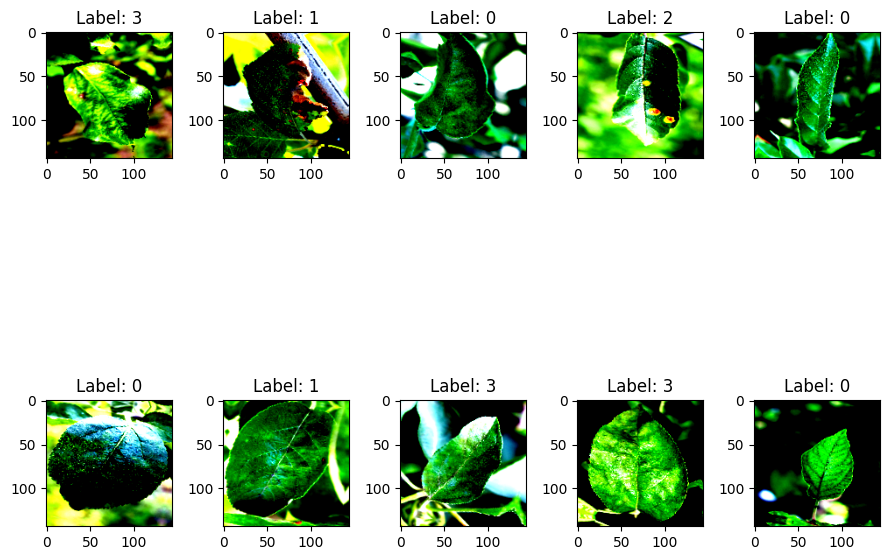

In [36]:
from torch.utils.data import DataLoader

# Création de l'instance du dataset
leaf_dataset = LeafDataset()

# Création d'un DataLoader pour charger les données
batch_size = 10
data_loader = DataLoader(leaf_dataset, batch_size=batch_size, shuffle=False)

# Affichage des 10 premières images
num_displayed = 0
for batch_idx, (images, labels) in enumerate(data_loader):
    for i in range(len(images)):
        # Afficher l'image
        plt.subplot(2, 5, num_displayed + 1)
        plt.imshow(images[i].permute(1, 2, 0))  # Assurez-vous que les dimensions sont dans l'ordre attendu pour Matplotlib
        plt.title(f"Label: {labels[i]}")
        #plt.axis('off')
        num_displayed += 1
        
        if num_displayed == 10:
            break
    if num_displayed == 10:
        break

plt.tight_layout()
plt.show()

In [94]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  # Check for GPU availability

In [15]:
#A positional encoding layer is used to add data to each patch that encodes its position
# so that the network can determine that a patch came from the top left of the picture of from the center.
import torch
import matplotlib.pyplot as plt

def PositionalEncoding(sequence_len, output_dim, n=10000):
    P = torch.zeros((sequence_len, output_dim))
    for k in range(sequence_len):
        for i in range(0, output_dim, 2):
            denominator = torch.tensor(n, dtype=torch.float).pow(2 * i / output_dim)
            P[k, i] = torch.sin(k / denominator)
            P[k, i + 1] = torch.cos(k / denominator)
    return P

In [97]:
from torch import nn

class PatchEmbedding(nn.Module):
    def __init__(self, img_size, patch_size, in_channels, emb_size):
        super().__init__()

        self.img_size = img_size
        self.patch_size = patch_size

        self.n_patches = (img_size // patch_size) * (img_size // patch_size)


        self.patch_embedding = nn.Sequential(
            nn.Conv2d(in_channels, out_channels = self.n_patches, kernel_size=patch_size, stride=patch_size), 
                                            # image -> réduite a partir de convolution 
                                            # out_channels = self.n_patches    - on passe de 144*144 pixels a self.n_patches ici 18 *18
                                            #kernel_size  patch size -> comme ca on va mapeer dans l'espace vectoriell l'image - par rapport a ces patch  - donc le kernel resume le patch en une valeur - c'est pour ca qu'on aplique kernel_size = patch_size
                                            #stride c'est le pas - donc si = kerbel size -> on aura pas de chevauchement
        
            nn.Flatten(start_dim=2), #1ere dimenson = taille du batch  - donc on commence a 2 
            nn.Linear(self.n_patches, emb_size) 
                                            #Flat -> transfo en sequence
                                            #n_patches -> emb_size     - on reduit le vecteur a la taille de emb size = tailled de chaque vector representatif d'image
        )
        
        
        self.cls_token = nn.Parameter(torch.zeros(1, 1, emb_size))
                                #classifier token

        self.pos_encoding = PositionalEncoding(sequence_len=self.n_patches, output_dim=emb_size)
                        #output_dim = dimension de l'encodage de position
                        #doit etre = dimension de sortie de la convolution du patch embeding

    def forward(self, x):
        #x = input image
        
        B, C, H, W = x.shape #batch size, channels, height, and width of the input image

        x = self.patch_embedding(x) #patch embeding layer
        print(x.shape)

        x = x + self.pos_encoding.to(device)  # Apply positional encoding

        # Add class token
        cls_tokens = self.cls_token.expand(B, -1, -1) # Expand class token for each item in the batch
        x = torch.cat((cls_tokens, x), dim=1) # Shape: [B, n_patches+1, emb_size]

        

        return x

# Test Patch Embedding Code
sample_datapoint = torch.unsqueeze(leaf_dataset[0][0], 0).to(device) 
print("Initial shape: ", sample_datapoint.shape)

model = PatchEmbedding(img_size=144, patch_size=8, in_channels=3, emb_size=64)
model.to(device)
embedding = model(sample_datapoint)
print("Patches shape: ", embedding.shape)

Initial shape:  torch.Size([1, 3, 144, 144])
torch.Size([1, 324, 64])
Patches shape:  torch.Size([1, 325, 64])


In [102]:
#partie gauche (encoder) de l'architexture d'un transformer

class TransformerEncoder(nn.Module):
    def __init__(self, embed_dim, num_heads, mlp_dim):
        super().__init__()

        self.attention = torch.nn.MultiheadAttention(embed_dim=dim,num_heads=n_heads)
        self.norm1 = nn.LayerNorm(embed_dim) # first layer normalization - pour la premiere connexion résiduel

        self.mlp = nn.Sequential(  #MLP -> feed-forward layer
            nn.Linear(embed_dim, mlp_dim),
            nn.GELU(),
            nn.Linear(mlp_dim, embed_dim)
        )
        self.norm2 = nn.LayerNorm(embed_dim) #  second layer normalization - connexion résiduel aprés le MLP

        self.dropout = nn.Dropout(0.1) #dropout layer to prevent overfitting during training

    def forward(self, x):
        attn_out = self.attention(x)

        x = x + self.dropout(attn_out)  #dropout pour eviter overfiting    #ADD
        x = self.norm1(x)  #1ere normalisation                             #& NORM

        mlp_out = self.mlp(x)                                              #FEED-FORWARD

        x = x + self.dropout(mlp_out)                                      #ADD
        x = self.norm2(x) #2eme normalisation                              #& NORM

        return x